In [3]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [4]:
import pandas as pd
import numpy as np
import ontime as on

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


# Detectors

Detectors allow you to get a signal given a condition. The condition can be an absolute 
threshold or statistical threshold with a quantile. Let's make an example.

## Generate a TimeSeries

This is only to have some data for the purpose of the example.

In [5]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

In [6]:
ts.head(3)

<TimeSeries (DataArray) (time: 3, component: 1, sample: 1)>
array([[[-0.33124628]],

       [[ 0.3419233 ]],

       [[ 2.17150963]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 2022-01-03
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### Detection given an abolute threshold

With a single line of code, you can make your absolute detector.

In [14]:
td = on.detectors.threshold(low_threshold=-2)

Now, a detection on any TimeSeries can be made as follow : 

In [16]:
ats = td.detect(ts)

The return type of the detect function is a BinaryTimeSeries, meaning that it will always have values being 0 or 1.

In [19]:
type(ats)

ontime.core.time_series.binary_time_series.BinaryTimeSeries

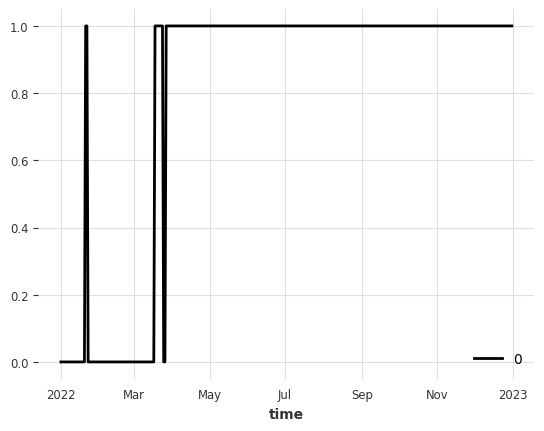

In [21]:
ats.plot();

### Detection given a statistical threshold (quantile)

Here the idea is similar but the threshold is dependant on the data. The quantile detector can be instanciated as follow

In [30]:
td = on.detectors.quantile(low_quantile=0.1)

And then, it can be fit

In [31]:
td.fit(ts)

Now, the usage is similar to the threshold detector.

In [33]:
ats = td.detect(ts)

The TimeSeries is also a BinaryTimeSeries with values being 0 or 1.

In [34]:
type(ats)

ontime.core.time_series.binary_time_series.BinaryTimeSeries

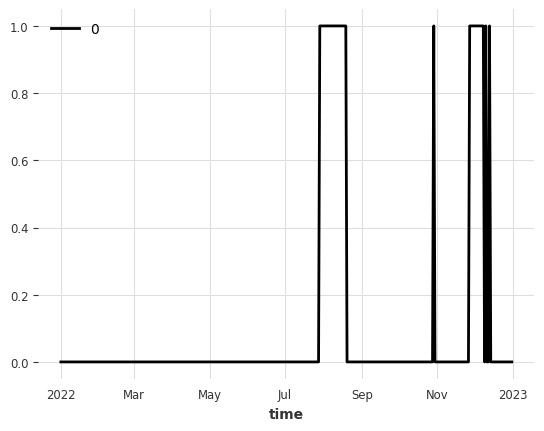

In [35]:
ats.plot();